# 二分探索法

In [4]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random
from my_modules import record

In [32]:
def binary_search(sorted_records, key):
    N = len(sorted_records)
    i_left = 0
    i_right = N - 1
    if key == sorted_records[i_left][0]:
        return sorted_records[i_left]
    if key == sorted_records[i_right][0]:
        return sorted_records[i_right]
    i_centor = int((i_right + i_left) / 2)
    while i_left < i_centor:
        key_centor = sorted_records[i_centor][0]
        if key < key_centor:
            i_right = i_centor
        elif key_centor < key:
            i_left = i_centor
        else:
            return sorted_records[i_centor]
        i_centor = int((i_right + i_left) / 2)
    raise Exception('key \'{}\' does not exist in records.'.format(key))

In [35]:
records = record.get_unique_records(10, sort=True)
result = binary_search(records, 8)
records, result

(array([[ 0,  0],
        [ 1, 10],
        [ 2, 20],
        [ 3, 30],
        [ 4, 40],
        [ 5, 50],
        [ 6, 60],
        [ 7, 70],
        [ 8, 80],
        [ 9, 90]]), array([ 8, 80]))

In [85]:
N_TRY = 10000
n_list = []
t_ave_list = []
for n in [int(pow(2, i)) for i in range(10, 19+1)]:
    records = record.get_unique_records(n, sort=True)
    search_keys = np.random.randint(0, n, N_TRY)
    start = time.time()
    for key in search_keys:
        binary_search(records, key)
    end = time.time()
    n_list.append(n)
    t_ave_list.append(round((end-start)*1e6/N_TRY, 3))

pd.DataFrame(data=np.array([n_list, t_ave_list]).T, columns=['number of records', 'average search time [$\mu$s]'])

,number of records,average search time [$\mu$s]
0,1024.0,16.502
1,2048.0,18.651
2,4096.0,18.181
3,8192.0,19.415
4,16384.0,22.404
5,32768.0,22.214
6,65536.0,25.993
7,131072.0,25.139
8,262144.0,26.866
9,524288.0,27.731


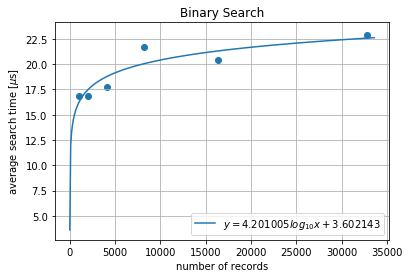

In [91]:
from scipy.optimize import curve_fit
def func_fit(x, a, b):
    return a * np.log10(x) + b

param, cov = curve_fit(func_fit, n_list, t_ave_list)
x = np.array([i*100 for i in range(int(max(n_list)/100)+10)]) + 1.0
y = func_fit(x, param[0], param[1])

plt.title('Binary Search')
plt.xlabel('number of records')
plt.ylabel('average search time [$\mu$s]')
plt.plot(x, y, label='$y = {}log_{{10}}{{x}} + {}$'.format(round(param[0], 6), round(param[1], 6)))
plt.scatter(n_list, t_ave_list)
plt.grid()
plt.legend()
plt.show()